# completing the square
> As always, we need our friends.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import Integer as I, Rational as R, solve, S, N
import plotutils as pu
%matplotlib inline

This is just a quick reference on how to solve quadratic equations using [square completion](https://en.wikipedia.org/wiki/Completing_the_square). We'll use `sympy` and `matplotlib` to verify our results.

**Completing the square** is a basic method of solving a quadratic equation. In fact, the [quadratic formula](https://en.wikipedia.org/wiki/Quadratic_formula) can be proven using the method of completing the square.

>$(x + a)^2 = x^2 + 2ax + a^2$

We'll start with a basic *quadratic equation* by writing down a random one: $x^2 + 5x - 18 = 0$

Note that you can write down anything like $ax^2 + bx + c$ and just substitude $a$, $b$ and $c$ with some random numbers and it will work. You might run into negative roots but then you can just involve the [imaginary number](https://en.wikipedia.org/wiki/Imaginary_number) and solve it anyways (for example, see the second example below).

What we are aiming for is to write it in a square form such as $(x + a)^2 = y$ so we can actually solve it by saying $x + a = \sqrt{y}$.

Let's get back to our equation $x^2 + 5x - 18 = 0$. We'll start by adding $18$ to each side:

$$
\begin{align}
x^2 + 5x - 18 & = 0 \\
x^2 + 5x & = 18 
\end{align}
$$

Just as a reminder:

> $(x + a)^2 = (x + a) \times (x + a) = x \times x + a \times x + a \times x + a \times a =  x^2 + 2ax + a^2$

In this case $2ax = 5x$ so in order to figure out what $a$ is we need to divide both sides by $2x$. This gives us $a = \frac{5}{2} = 2\frac{1}{2}$. We need to add $a^2 = {2\frac{1}{2}}^2 = \frac{25}{4} = 6\frac{1}{4}$ to *complete the square* and the rules of algebra tell us that we need to add it to each side: 

$$
\begin{align}
x^2 + 5x & = 18 \\
x^2 + 5x + 6\frac{1}{4} & = 18 + 6\frac{1}{4} \\
x^2 + 5x + 6\frac{1}{4} & = 24\frac{1}{4}
\end{align}
$$

Now we have a constant number on the right-hand side. It's a rational but that's no problem. At least its positive so we don't need $i$ for this. More importantly though, the left-hand side is in a $x^2 + 2ax + a^2$ configuration. That means we can now rewrite it as $(x + a)^2$.

$$
\begin{align}
x^2 + 5x + 6\frac{1}{4} & = 24\frac{1}{4} \\
(x - 2\frac{1}{2})^2 & = 24\frac{1}{4}
\end{align}
$$

So now that we have a square expression on the left and a constant on the right we can start to formulate an answer:

$$
\begin{align}
(x + 2\frac{1}{2}) 
= \pm\sqrt{24\frac{1}{4}} \implies x & = -2\frac{1}{2} - \sqrt{24\frac{1}{4}} \cup -2\frac{1}{2} + \sqrt{24\frac{1}{4}} \\
& = -2\frac{1}{2} - \frac{1}{2}\sqrt{97} \cup -2\frac{1}{2} + \frac{1}{2}\sqrt{97}
\end{align}
$$

We can check this using `sympy`.

In [2]:
expr = S('x^2 + 5*x - 18')
solve(expr)

[-5/2 + sqrt(97)/2, -sqrt(97)/2 - 5/2]

Bcause we *can* and because it's kinda fun and easy to plot we'll try to visualize the solution as well.

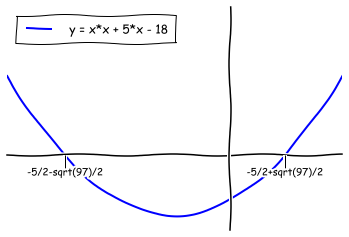

In [57]:
with plt.xkcd():
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position(('data', 0))
    ax.spines['bottom'].set_position(('data', 0))
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_ticks([-5/2-np.sqrt(97)/2, -5/2+np.sqrt(97)/2])
    ax.yaxis.set_ticks([])
    ax.xaxis.set_ticklabels(['-5/2-sqrt(97)/2', '-5/2+sqrt(97)/2'])
    ax.tick_params(direction='out', width=1.0, length=20.0)
    x = np.linspace(-10, 5, 100)
    y = x**2 + 5*x - 18
    plt.plot(x, y, label='y = x*x + 5*x - 18')
    plt.ylim(-30, 60)
    plt.legend(loc=2)

# imaginary example
So let's try another one. Again, we'll just jot down some random quadratic equation: $3x^2 - 3x + 5 = 0$. We want to get rid of that $3$ at the beginning so we'll start by scaling down the whole by a factor of $3$.

$\frac{3x^2 - 3x + 5}{3} = 0 \implies x^2 - x + \frac{5}{3} = 0 $

Now that we have something a bit easier to work with, the next thing we want is to write the left hand side as $x^2 + 2ax + a^2$.

<hr/>

$$
\begin{align}
x^2 - x + \frac{5}{3} & = 0 \\
x^2 - x & = -\frac{5}{3} & \text{subtract $\frac{5}{3}$} \\
x^2 - x + \frac{1}{4} & = -\frac{5}{3} + \frac{1}{4} & \text{add $a^2$ with $a = \frac{1}{2}$} \\
x^2 - x + \frac{1}{4} & = -\frac{17}{12} & \text{simplify} \\
(x - \frac{1}{2})^2 & = -\frac{17}{12} & \text{write as square} \\
x - \frac{1}{2} & = \pm \sqrt{-\frac{17}{12}} & \text{unsquare left-hand side} \\
x & = \frac{1}{2} \pm \sqrt{\frac{17}{12}}i & \text{remove negative root using $i$} \\
x & = \frac{1}{2} \pm \sqrt{51}\frac{i}{6} & \text{simplify}
\end{align}
$$

<hr/>

Let's check if `sympy` agrees with our answer.

In [36]:
solve(S('x^2 - x + 5/3'))

[1/2 - sqrt(51)*I/6, 1/2 + sqrt(51)*I/6]

Looks like we got it. To be honest, I kinda cheated on the last simplify step by using `sympy` to simplify the square root of the rational. Let's make sure our initial answer was correct.

In [38]:
initial = sympy.sqrt(R(17, 12))*sympy.I
final = sympy.sqrt(51)*sympy.I/6
initial == final

True